---
# 120 YEARS OF OLYMPIC DATA ANALYSIS  - ***Team Jupyter***
Best athletes and medal prediction in modern olympics games.


---

## Problem Statement:

- Given a dataset containing 120 years of Olympic data, the problem is to analyze the data and identify the best athletes in modern Olympic games. 
- Additionally, the task is to develop a model for predicting medal outcomes for future Olympic events based on historical trends.

**The specific objectives of this analysis are as follows:**<br>

 >- **Identify the best athletes**: Analyze the dataset to determine the top-performing athletes in the modern Olympic games. This analysis should consider various factors and relevant metrics available in the dataset.<br>
 >- **Medal prediction model**: Utilize the historical data to develop a predictive model that can forecast medal outcomes for future Olympic events. The model should consider various factors such as athlete performance, country-specific trends, sports discipline, and any other relevant features available in the dataset.

## Goal:

- This analysis aims to provide insights into the performance of athletes in modern Olympic games and offer a tool for predicting medal outcomes, thereby assisting stakeholders, including athletes, coaches, and sports enthusiasts, in making informed decisions and setting realistic expectations for future Olympic events.

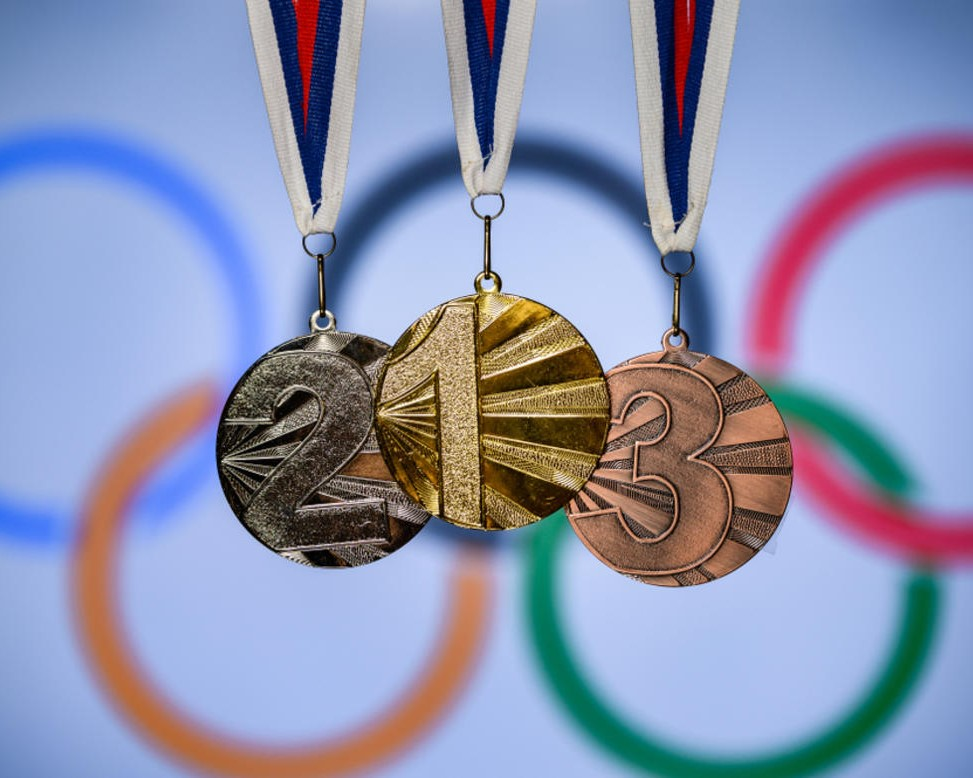

<a id="cont"></a>

## Table of Contents

<a href=#one>1.   Importing Packages</a>

<a href=#two>2.   Loading Data / Data Pre-processing</a>

<a href=#three>3. Exploratory Data Analysis(EDA)</a>

<a href=#four>4.  Modeling</a>

<a href=#five>5.  Spliting the data</a>

<a href=#six>6.   Model Training/ Evaluation</a>

<a href=#seven>7. Hyperparameter tuning</a>

<a href=#eight>8. Prediction</a>

<a href=#nine>9.  Conclusion</a>

---

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

---

<a id="two"></a>
## 2. Loading the Data/ Data Pre-processing
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [2]:
df1 = pd.read_csv('athlete_events.csv')
df2 = pd.read_csv('noc_regions.csv')

In [3]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df1.shape

(271116, 15)

In [5]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df2.shape

(230, 3)

---

- To maximize the analysis, We will merge the two datasets, **df1** and **df2**, based on the common column **'NOC'**. By doing so, we can combine the information from both datasets that corresponds to the same 'NOC' values. This will allow us to leverage the shared information and perform comprehensive analysis using the merged dataset.<br>
- To make a decision from a more modern perspective, we will focus on the information from the year 2000 and onwards. This means that we will consider data and features that are relevant and available from the year 2000, excluding earlier years.


---

In [7]:
# Merge both dataset on "NOC"
df = df1.merge(df2, on='NOC')

In [8]:
# Size of merged dataset
df.shape

(270767, 17)

In [9]:
# Filter for modern games. i.e from 2000
modern_sports = df[df['Year'] >= 2000]

In [10]:
modern_sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN


In [11]:
# Size of dataset from year 2000 onwards
modern_sports.shape

(85109, 17)

---

<a id="three"></a>
# 3. Exploratory Data Analysis(EDA)
<a class="anchor" id="1.3"></a>
<a href=#cont>Back to Table of Contents</a>

---


#### 'Sex' feature analysis

In [12]:
# Map gender values to dummy values, 0 for females and 1 for males
modern_sports['Sex'] = modern_sports['Sex'].map({'M': 1, 'F': 0})

In [13]:
modern_sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,1,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,1,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,0,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,0,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN


#### 'Medal' (target variable) analysis

In [14]:
medalists_df = modern_sports[modern_sports['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

---

**Exploring the relationship between COUNTRIES and MEDAL**

In [15]:
#countries with the most medals
medalists_df.groupby('region')['Medal'].count().sort_values(ascending=False)

region
USA           1631
Russia         945
Germany        824
Australia      695
China          658
              ... 
Sri Lanka        1
Mauritius        1
Mozambique       1
Niger            1
Kosovo           1
Name: Medal, Length: 115, dtype: int64

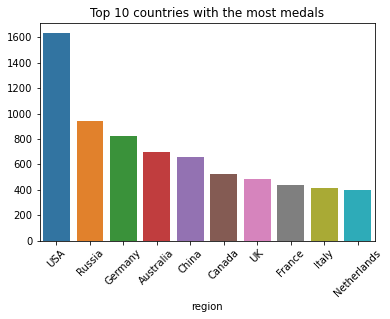

In [16]:
# Visualizing top 10 countries with most medals
top_countries = medalists_df.groupby('region')['Medal'].count().sort_values(ascending=False)
sns.barplot(x=top_countries.index[:10], y=top_countries.values[:10])
plt.xticks(rotation=45)
plt.title('Top 10 countries with the most medals')
plt.show()

---

>> - The analysis focused on examining the relationship between countries and their medal counts.<br>
>> - The data was grouped based on the countries with the **highest number of overall medals**, with a specific focus on ***gold, silver, and bronze medals***. <br>
>> - The **top 10 countries** with the **highest medal counts** were selected for further analysis.<br>
>> - From the resulting chart, it is evident that the **USA** stands out as the dominant country in this analysis.


---

#### Exploring the relationship between **TOP 3 COUNTRIES**, **YEAR**(2000 - 2016) and **MEDAL counts**<br>
>> - Creating a DataFrame called **top_countries_df** by filtering the medalists_df DataFrame based on the countries 
'USA', 'Russia', and 'Germany' using the 'region' column.
>>- Creating a pivot table called **top_countries_medals_per_year** is created from the ***top_countries_df***. 
>>- It calculates the count of medals (represented by the 'ID' column) for each country ('USA', 'Russia', 'Germany') and each year, resulting in a table with years as the index and countries as the columns.

---

In [17]:
top_countries_df = medalists_df[medalists_df['region'].isin(['USA', 'Russia', 'Germany'])]
top_countries_medals_per_year = pd.pivot_table(top_countries_df, values=['ID'],
                                columns=['region'],
                                index=['Year'],
                                aggfunc='count')

In [18]:
top_countries_medals_per_year = top_countries_medals_per_year[top_countries_medals_per_year.index >= 2000]
top_countries_medals_per_year

ID            
region Germany Russia  USA
Year                      
2000       118    187  242
2002        61     38   84
2004       149    189  263
2006        54     41   52
2008        99    142  317
2010        54     25   97
2012        94    140  248
2014        36     68   64
2016       159    115  264

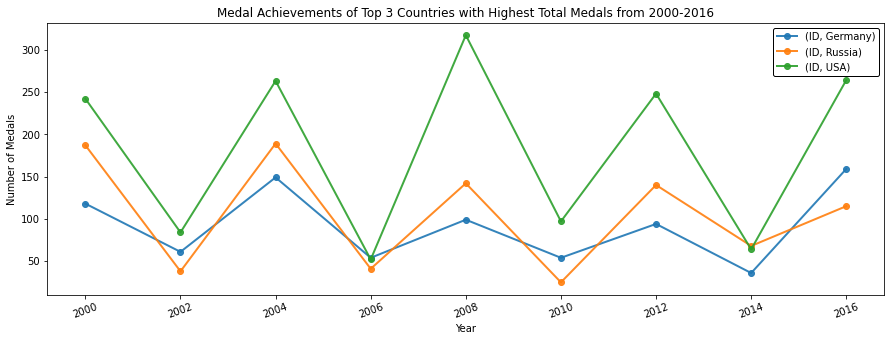

In [19]:
top_countries_medals_per_year.plot(linestyle='-', marker='o', alpha=0.9, figsize=(15,5), linewidth=2)
plt.legend(facecolor='white', framealpha=1, edgecolor='black')
plt.xlabel('Year')
plt.xticks(top_countries_medals_per_year.index)
plt.ylabel('Number of Medals')
plt.title('Medal Achievements of Top 3 Countries with Highest Total Medals from 2000-2016')
plt.xticks(rotation=20)
plt.show()

---

> - The resulting **top_countries_medals_per_year** DataFrame provides a **summary of the number of medals won by the top countries** ('USA', 'Russia', 'Germany') **over the years**. 
> - It allows for easy comparison of medal counts between these countries and can help identify trends or patterns in their performances over time.

---

### 3.1     Feature Engineering

> - We will assign a continent to each country based on the country's region. 
> - It creates a new column called **continent** in the DataFrame.
> - The countries are grouped into different lists based on their respective continents.

In [20]:
# List of countries by continent
asia = ['Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Timor-Leste',
        'Georgia', 'India', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Japan', 'Kyrgyzstan', 'Kuwait', 'Laos', 'Lebanon',
        'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
        'Philippines', 'Qatar', 'Saudi Arabia', 'South Korea', 'Syria', 'Taiwan', 'Sri Lanka', 'Tajikistan', 'Thailand',
         'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Azerbaijan', 'Indonesia']


europe = ['Albania', 'Andorra', 'Angola', 'Antigua', 'Armenia', 'Austria', 'Azerbaijan',
          'Belgium', 'Bosnia and Herzegovina', 'Belize', 'Belarus', 'Czech Republic', 'Bulgaria',
          'Croatia', 'Cyprus', 'Denmark', 'Hungary', 'Iceland', 'Italy', 'Kazakhstan', 'Kosovo', 'Finland',
          'France', 'Georgia', 'Germany', 'Greece', 'Ireland', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
          'Latvia', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
          'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden','Turkey',
          'Switzerland', 'Ukraine', 'UK', 'Macedonia', 'Virgin Islands, British']

africa = ['Angola', 'Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon',
          'Democratic Republic of the Congo', 'Chad', 'Central African Republic', 'Republic of Congo',
          'Democratic Republic of the Congo', 'Gabon', 'Gambia', 'Ghana', 'Equatorial Guinea', 'Guinea',
          'Guinea-Bissau', 'Morocco', 'Egypt', 'Kenya', 'Libya', 'Mali', 'Senegal', 'Solomon Islands',
          'Somalia', 'South Sudan', 'Tunisia', 'Zimbabwe', 'Zambia', 'Sudan', 'Sierra Leone', 'Comoros',
          'Ivory Coast', 'Djibouti', 'Eritrea', 'Swaziland', 'Ethiopia', 'Lesotho', 'Liberia', 'Madagascar',
          'Malawi', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
          'Sao Tome and Principe', 'Seychelles', 'South Africa', 'Tanzania', 'Togo', 'Uganda']

north_america = ['Antigua', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
                 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
                  'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts', 'Saint Vincent', 'Saint Lucia', 'Trinidad',
                 'USA', 'Cayman Islands', 'American Samoa', 'Puerto Rico', 'Aruba', 'Bermuda']

south_america = ['Argentina', 'Boliva', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
                 'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Curacao']

oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
           'Palau', 'Papua New Guinea', 'Samoa', 'Tonga', 'Cook Islands', 'Individual Olympic Athletes',
           'Vanuatu', 'nan', 'Guam', 'US']

# Create a new column 'continent' in the 'df' DataFrame and assign continent values
modern_sports['continent'] = pd.np.where(modern_sports['region'].isin(europe), 'Europe',
                pd.np.where(modern_sports['region'].isin(africa), 'Africa',
                pd.np.where(modern_sports['region'].isin(asia), 'Asia',
                pd.np.where(modern_sports['region'].isin(north_america), 'North America',
                pd.np.where(modern_sports['region'].isin(south_america), 'South America',
                pd.np.where(modern_sports['region'].isin(oceania), 'Oceania','unknown')))))  )

In [21]:
modern_sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,continent
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,Asia
2,602,Abudoureheman,1,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,Asia
3,1463,Ai Linuer,1,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,Asia
4,1464,Ai Yanhan,0,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,Asia
5,1464,Ai Yanhan,0,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,Asia


---

#### Exploring the relationship  between Africa (continent) and Medal

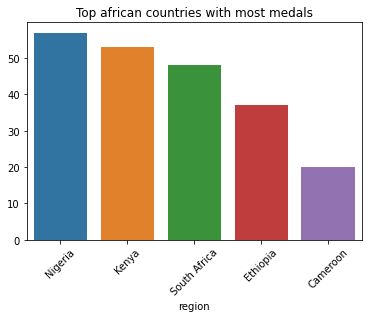

In [22]:
africa_df = modern_sports[modern_sports['continent']== 'Africa'].reset_index(drop=True)
top_african_countries = africa_df.groupby('region')['Medal'].count().sort_values(ascending=False)
sns.barplot(x=top_african_countries.index[:5], y=top_african_countries.values[:5])
plt.xticks(rotation=45)
plt.title('Top african countries with most medals')
plt.show()

>- This plot counts the **number of medals for each country**, sorting them in descending order.
>- The resulting bar plot displays the **top 5 African countries** with the **highest medal counts**. 
>- The plot provides a visual comparison of the medal counts among the selected African countries.

---

#### Exploring the relationship between TOP MEDALIST and MEDAL WON

In [23]:
top_athletes = medalists_df['Name'].value_counts()

top_athletes_df = medalists_df[medalists_df['Name'].isin(top_athletes.index[:10])]

top_athletes_df = top_athletes_df.reset_index(drop=True)

pivot_table = pd.pivot_table(top_athletes_df, values=['ID'],
                                columns=['Medal'],
                                index=['Name', 'region'],
                                aggfunc='count')
pivot_table.fillna(0, inplace=True)

pivot_table['total'] = pivot_table['ID', 'Gold'] + pivot_table['ID', 'Silver'] + pivot_table['ID', 'Bronze']
pivot_table = pivot_table.sort_values('total', ascending=False)
pivot_table

ID              total
Medal                                            Bronze  Gold Silver      
Name                                 region                               
Michael Fred Phelps, II              USA            2.0  23.0    3.0  28.0
Natalie Anne Coughlin (-Hall)        USA            5.0   3.0    4.0  12.0
Ryan Steven Lochte                   USA            3.0   6.0    3.0  12.0
Ole Einar Bjrndalen                  Norway         1.0   7.0    3.0  11.0
Marit Bjrgen                         Norway         1.0   6.0    3.0  10.0
Allyson Michelle Felix               USA            0.0   6.0    3.0   9.0
Ian James Thorpe                     Australia      1.0   5.0    3.0   9.0
Leisel Marie Jones                   Australia      1.0   3.0    5.0   9.0
Dara Grace Torres (-Hoffman, -Minas) USA            3.0   2.0    3.0   8.0
Viktor An                            Russia         1.0   3.0    0.0   4.0
                                     South Korea    1.0   3.0    0.0   4.0

 ---
 
 >- The occurrences of each athlete's name in medalists_df provides a **count of how many medals each athlete has won**.
 >- Futher filtering  medalists_df based on the **top 10 athletes** with the **highest medal counts**.
 
 
---

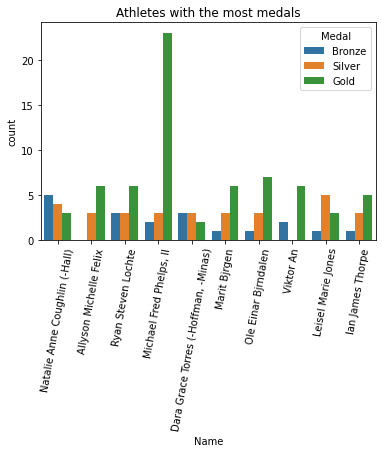

In [24]:
sns.countplot(x=top_athletes_df['Name'], hue=top_athletes_df['Medal'])
plt.xticks(rotation=80)
plt.title('Athletes with the most medals')
plt.show()

- This pivot_table provides a **summary of the top athletes**, their **respective countries/regions**, and the **count of gold, silver, bronze, and total medals** they have earned.

### 3.2   Feature selection

>- It is important to identify and eliminate unnecessary columns from the dataset based on their relevance and importance. 
>- This involves dropping features that do not have a significant impact on the target variable or do not contribute valuable information to the analysis. 
>- By removing such features, we can simplify the dataset and focus on the most influential and informative attributes.

In [25]:
# columns
modern_sports.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'continent'],
      dtype='object')

In [26]:
#dropping unnecessary columns
countries = ['NOC', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Sport', 'Medal']
for i in modern_sports.columns:
    if i not in countries:
        modern_sports.drop(i, axis = 1, inplace=True)

In [27]:
modern_sports

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
1,A Lamusi,1,23.0,170.0,60.0,CHN,2012,Judo,NaN
2,Abudoureheman,1,22.0,182.0,75.0,CHN,2000,Boxing,NaN
3,Ai Linuer,1,25.0,160.0,62.0,CHN,2004,Wrestling,NaN
4,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
5,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
...,...,...,...,...,...,...,...,...,...
270760,Likeleli Alinah Thamae,0,22.0,170.0,49.0,LES,2000,Taekwondo,NaN
270761,Masempe Theko,0,25.0,NaN,NaN,LES,2012,Swimming,NaN
270762,Mamorallo Tjoka,0,23.0,150.0,56.0,LES,2008,Athletics,NaN
270763,Mamorallo Tjoka,0,27.0,150.0,56.0,LES,2012,Athletics,NaN


>- We will create a separate copy of the original DataFrame to work with, while preserving the original modern_sports DataFrame

In [28]:
df = modern_sports.copy()

In [29]:
#filtering for only gold medal winners
df1 = modern_sports[modern_sports['Medal'] == 'Gold']

Text(0.5, 1.0, 'Top 20 Countries with the most gold medals')

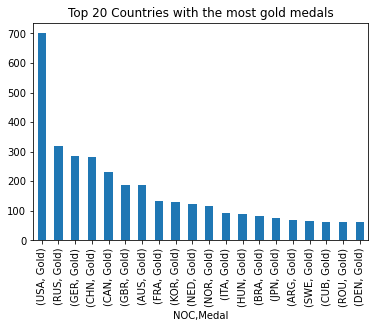

In [30]:
dff = df1.groupby('NOC').Medal.value_counts().sort_values(ascending=False)[:20]#top 20
dff.plot(kind='bar')
plt.title('Top 20 Countries with the most gold medals')

>- This bar plot visualizes the **top 20 countries** with the **most gold medals**.
>- Each country is represented by a bar, and the height of the bar corresponds to the number of gold medals won by that country.

In [31]:
#filtering top 10 NOC
NOC = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df1 = df1[(df1['NOC'] == NOC[0]) | (df1['NOC'] == NOC[1]) | (df1['NOC'] == NOC[2]) | (df1['NOC'] == NOC[3]) | (df1['NOC'] == NOC[4]) | (df1['NOC'] == NOC[5]) | (df1['NOC'] == NOC[6]) | (df1['NOC'] == NOC[7]) | (df1['NOC'] == NOC[8]) | (df1['NOC'] == NOC[9])]

---


>- By applying this filter, **df1** will only contain the rows corresponding to the **specified top 10 NOCs**, effectively reducing the dataset to focus on these specific countries for further analysis.
>- This narrows down the dataset to include data only for the top 10 NOCs mentioned, allowing for more targeted analysis and insights related to those specific countries.


---

In [32]:
df1.describe()

,Sex,Age,Height,Weight,Year
count,2581.000000,2581.000000,2579.000000,2569.000000,2581.000000
mean,0.490895,25.996126,178.013959,73.659595,2008.203797
std,0.500014,5.257625,11.395042,15.617209,5.436055
min,0.000000,15.000000,137.000000,28.000000,2000.000000
25%,0.000000,22.000000,170.000000,62.000000,2004.000000
50%,0.000000,25.000000,178.000000,72.000000,2008.000000
75%,1.000000,29.000000,185.000000,84.000000,2012.000000
max,1.000000,58.000000,219.000000,146.000000,2016.000000


---


#### AGE (feature) distribution
Top 20 countries with the most **Gold** medal.

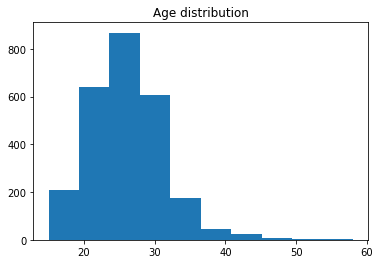

In [33]:
df1['Age'].hist()
plt.title('Age distribution')
plt.grid(visible=False)

>- This plot likely represents the distribution of age among gold medalists from these countries, and the peak or highest frequency of athletes falls within the mid-20s range.
>- This suggests that athletes in their mid-20s tend to have a higher probability of achieving success and winning gold medals in the Olympic Games.
>- It aligns with the notion that individuals in their physical prime and peak athletic performance often excel in competitive sports events.

---


#### HEIGHT (feature) distribution
**Top 20 countries** with the most **Gold** medal.

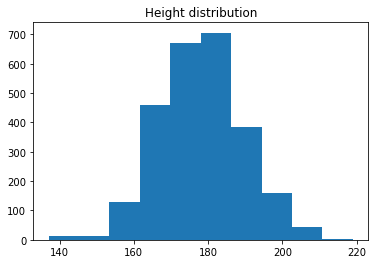

In [34]:
df1['Height'].hist()
plt.title('Height distribution')
plt.grid(visible=False)

>- This implies that a significant number of athletes from these **top 20 countries** tend to have **heights exceeding 180 cm**.
>- The fact that the heights are mostly over 180 cm suggests that there is a prevalence of taller athletes among the top 20 countries.


---

---


#### WEIGHT (feature) distribution
**Top 20 countries** with the most **Gold** medal.

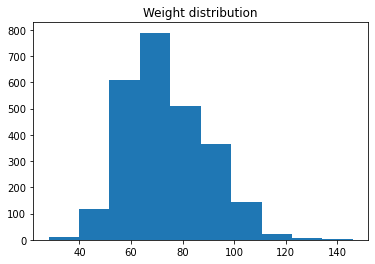

In [35]:
df1['Weight'].hist()
plt.title('Weight distribution')
plt.grid(visible=False)

>- Based on this plot, it appears that the weight distribution among athletes from the top 20 countries is concentrated around 70 kg (kilograms). 
>- This suggests that a significant number of athletes from these countries have weights that fall within the proximity of 70 kg.

---


Lets create thresholds for three variables: **Height, Age, and Weight**. These thresholds determine the categorization of values within each variable. 

In [36]:
df_copy = df1.copy()

In [37]:
# Define the thresholds for height, age, and weight
thresholds = {
    'Height': {
        'high': 0.75,
        'mid': 0.5,
        'low': 0.25
    },
    'Age': {
        'high': 0.75,
        'mid': 0.5,
        'low': 0.25
    },
    'Weight': {
        'high': 0.75,
        'mid': 0.5,
        'low': 0.25
    }
}

# Define a function to categorize a column based on its thresholds
def categorize_column(column):
    column_name = column.name
    column_thresholds = thresholds[column_name]

    def categorize(x):
        if x >= column.quantile(column_thresholds['high']):
            return 'high'
        elif x >= column.quantile(column_thresholds['mid']):
            return 'mid'
        else:
            return 'low'

    return column.apply(categorize)

# Apply the categorization function to the respective columns
df_copy['height_category'] = categorize_column(df_copy['Height'])
df_copy['age_category'] = categorize_column(df_copy['Age'])
df_copy['weight_category'] = categorize_column(df_copy['Weight'])


---

>- This above code applies a categorization process to the variables **'Height', 'Age', and 'Weight'** based on predefined thresholds. 
>- Values **<= to 20th** percentile are categorized as **low** 
>- Values **between the 20th and 75th** percentile are categorized as **mid** 
>- Values **>= to 75th** percentile are categorized as **high**
>- This allows for insights into the distribution of height, age, and weight among the athletes, providing a clearer understanding of their respective distributions.


---

In [38]:
df_copy.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,height_category,age_category,weight_category
68,Cai Yalin,1,23.0,174.0,60.0,CHN,2000,Shooting,Gold,low,low,low
77,Cai Yun,1,32.0,181.0,68.0,CHN,2012,Badminton,Gold,mid,high,low
87,Cao Lei,0,24.0,168.0,75.0,CHN,2008,Weightlifting,Gold,low,low,mid
104,Cao Yuan,1,17.0,160.0,42.0,CHN,2012,Diving,Gold,low,low,low
105,Cao Yuan,1,21.0,160.0,42.0,CHN,2016,Diving,Gold,low,low,low


#### Analysis into 'Weight category'

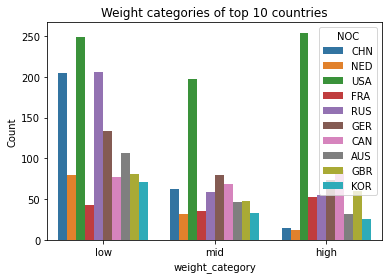

In [39]:
# Filter the DataFrame for the top 10 countries
top_10_countries = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df_top_10 = df_copy[df_copy['NOC'].isin(top_10_countries)]

sns.countplot(data=df_top_10, x='weight_category', hue='NOC')
plt.title('Weight categories of top 10 countries')
plt.xlabel('weight_category')
plt.ylabel('Count')
plt.show()

>- This countplot displays the distribution of weight categories among the athletes from the top 10 countries.
>-The plot shows the number of athletes in each weight category for each country, with the countries differentiated by color. 


---

#### Analysis into 'Height category'

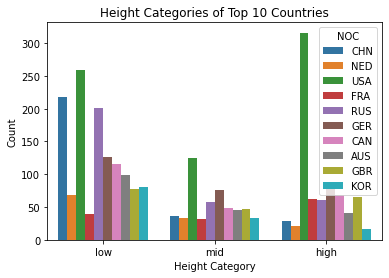

In [40]:
# Filter the DataFrame for the top 10 countries
top_10_countries = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df_top_10 = df_copy[df_copy['NOC'].isin(top_10_countries)]

sns.countplot(data=df_top_10, x='height_category', hue='NOC')
plt.title('Height Categories of Top 10 Countries')
plt.xlabel('Height Category')
plt.ylabel('Count')
plt.show()

>- This countplot displays the distribution of height categories among the athletes from the top 10 countries.
>-The plot shows the number of athletes in each height category for each country, with the countries differentiated by color. 


---

#### Analysis into 'Age category'

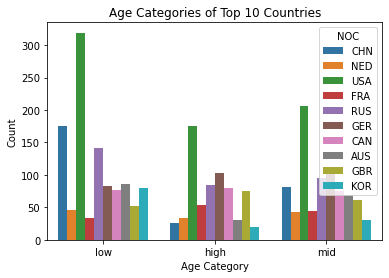

In [41]:
# Filter the DataFrame for the top 10 countries
top_10_countries = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df_top_10 = df_copy[df_copy['NOC'].isin(top_10_countries)]

sns.countplot(data=df_top_10, x='age_category', hue='NOC')
plt.title('Age Categories of Top 10 Countries')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

>- This countplot displays the distribution of Age categories among the athletes from the top 10 countries.
>-The plot shows the number of athletes in each Age category for each country, with the countries differentiated by color. 


---

<a id="four"></a>
# 4. Modelling

<a class="anchor" id="4.0"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [42]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
1,A Lamusi,1,23.0,170.0,60.0,CHN,2012,Judo,NaN
2,Abudoureheman,1,22.0,182.0,75.0,CHN,2000,Boxing,NaN
3,Ai Linuer,1,25.0,160.0,62.0,CHN,2004,Wrestling,NaN
4,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
5,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN


#### Encoding
'NOC', 'Sport' and 'Medal' columns

>- Map the top ten countries(**NOC**) to numerical values from **0** to **9**. This mapping will allow the model to work with numerical representations of the countries instead of text.
>- Map the **medal categories** to numerical values from **1** to **3**. This mapping will encode the medal type as the target variable for the model.

In [43]:
#filtering top 10 NOC
NOC = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df = df[(df['NOC'] == NOC[0]) | (df['NOC'] == NOC[1]) | (df['NOC'] == NOC[2]) | (df['NOC'] == NOC[3]) | (df['NOC'] == NOC[4]) | (df['NOC'] == NOC[5]) | (df['NOC'] == NOC[6]) | (df['NOC'] == NOC[7]) | (df['NOC'] == NOC[8]) | (df['NOC'] == NOC[9])]

In [44]:
# mapping countries with number for model training
df['NOC'] = df['NOC'].map({'USA':1, 'RUS':2, 'GER':3, 'CHN':4, 'CAN':5, 'GBR':6, 'AUS':7, 'FRA':8, 'KOR':9, 'NED':10})

In [45]:
# mapping Medal with number
df['Medal'] = df['Medal'].map({'Gold':1, 'Silver':2, 'Bronze':3})

In [46]:
# Encode the Sport column
label_encoder = LabelEncoder()
df['sport_en'] = label_encoder.fit_transform(df['Sport'])

In [47]:
df

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,sport_en
1,A Lamusi,1,23.0,170.0,60.0,4,2012,Judo,NaN,25
2,Abudoureheman,1,22.0,182.0,75.0,4,2000,Boxing,NaN,9
3,Ai Linuer,1,25.0,160.0,62.0,4,2004,Wrestling,NaN,50
4,Ai Yanhan,0,14.0,168.0,54.0,4,2016,Swimming,NaN,40
5,Ai Yanhan,0,14.0,168.0,54.0,4,2016,Swimming,NaN,40
...,...,...,...,...,...,...,...,...,...,...
256200,Yun Seong-Bin,1,19.0,178.0,85.0,9,2014,Skeleton,NaN,35
256201,Yun Seong-Hun,1,25.0,177.0,73.0,9,2008,Hockey,NaN,23
256202,Yun Seong-Hun,1,29.0,177.0,73.0,9,2012,Hockey,NaN,23
256203,Yun Seung-Hyun,1,22.0,193.0,75.0,9,2016,Athletics,NaN,2


#### Drop null values.

>- This step ensures that the dataset used for training does not contain missing or incomplete information.

In [48]:
df.isna().sum()

Name            0
Sex             0
Age             0
Height         45
Weight        174
NOC             0
Year            0
Sport           0
Medal       24661
sport_en        0
dtype: int64

In [49]:
df.dropna(inplace=True)

In [50]:
df

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,sport_en
11,An Yulong,1,23.0,173.0,70.0,4,2002,Short Track Speed Skating,3.0,34
33,Bao Yingying,0,24.0,172.0,67.0,4,2008,Fencing,2.0,16
63,Cai Tongtong,0,18.0,168.0,48.0,4,2008,Rhythmic Gymnastics,2.0,29
68,Cai Yalin,1,23.0,174.0,60.0,4,2000,Shooting,1.0,33
76,Cai Yun,1,28.0,181.0,68.0,4,2008,Badminton,2.0,3
...,...,...,...,...,...,...,...,...,...,...
256185,Yun Mi-Jin,0,17.0,167.0,55.0,9,2000,Archery,1.0,1
256187,Yun Mi-Jin,0,21.0,167.0,55.0,9,2004,Archery,1.0,1
256195,Yun Ok-Hui,0,23.0,162.0,63.0,9,2008,Archery,3.0,1
256196,Yun Ok-Hui,0,23.0,162.0,63.0,9,2008,Archery,1.0,1


#### We will drop some other columns not needed for model training

In [51]:
df.drop(['Name', 'Sport'], inplace=True, axis=1)

In [52]:
df

,Sex,Age,Height,Weight,NOC,Year,Medal,sport_en
11,1,23.0,173.0,70.0,4,2002,3.0,34
33,0,24.0,172.0,67.0,4,2008,2.0,16
63,0,18.0,168.0,48.0,4,2008,2.0,29
68,1,23.0,174.0,60.0,4,2000,1.0,33
76,1,28.0,181.0,68.0,4,2008,2.0,3
...,...,...,...,...,...,...,...,...
256185,0,17.0,167.0,55.0,9,2000,1.0,1
256187,0,21.0,167.0,55.0,9,2004,1.0,1
256195,0,23.0,162.0,63.0,9,2008,3.0,1
256196,0,23.0,162.0,63.0,9,2008,1.0,1


<a id="five"></a>
# 5. Splitting the Data

<a class="anchor" id="5.0"></a>
<a href=#cont>Back to Table of Contents</a>

---

>>- Split the encoded dataset into training and testing subsets.
>>- The training set will be used to train the regression model, while the testing set will be used for evaluating the model's performance.

In [53]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Medal', axis=1)
y = df['Medal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5527, 7) (5527,)
Testing set shape: (1382, 7) (1382,)


<a id="six"></a>
# 6. Model Training/ Evaluation

<a class="anchor" id="6.0"></a>
<a href=#cont>Back to Table of Contents</a>

---

Linear Regression

In [54]:
Linear_model = LinearRegression()

# Fit the model to the data
Linear_model.fit(X, y)

# Predict the target values
y_pred = Linear_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6966007035702032
Root Mean Squared Error (RMSE): 0.8228284345155579
R-squared (R2): 0.002667070736178001


Decision Tree Regression

In [55]:
# Create a decision tree regressor
DTR_model = DecisionTreeRegressor()

# Fit the model to the data
DTR_model.fit(X, y)

# Predict the target values
y_pred = DTR_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.09026390698123221
Root Mean Squared Error (RMSE): 0.2628701008508929
R-squared (R2): 0.8982102706515956


Random Forest Regressor

In [56]:
# Create a Random Forest Regressor
RFR_model = RandomForestRegressor(max_features=1, min_samples_split=2, n_jobs=400)

# Fit the model to the data
RFR_model.fit(X, y)

# Predict the target values
y_pred = RFR_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.26143390319133913
Root Mean Squared Error (RMSE): 0.34972747690834827
R-squared (R2): 0.8198305779155798


Gradient Boosting Regressor

In [57]:
GBR_model = GradientBoostingRegressor()

# Fit the model to the data
GBR_model.fit(X, y)

# Predict the target values
y_pred = GBR_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6524024721810376
Root Mean Squared Error (RMSE): 0.770422720462886
R-squared (R2): 0.12566122227115817


---


Define the results

In [58]:
results = {
    'Algorithm': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [0.6966007035702032, 0.09026390698123221, 0.2606512382778123, 0.6524024721810379],
    'RMSE': [0.8228284345155579, 0.2628701008508929, 0.34963186355184667, 0.770422720462886],
    'R2': [0.002667070736178001, 0.8982102706515956, 0.8199290788884668, 0.12566122227115817]
}
results_df = pd.DataFrame(results)
print(results_df)

                     Algorithm       MAE      RMSE        R2
0            Linear Regression  0.696601  0.822828  0.002667
1     Decision Tree Regression  0.090264  0.262870  0.898210
2      Random Forest Regressor  0.260651  0.349632  0.819929
3  Gradient Boosting Regressor  0.652402  0.770423  0.125661


>>- Based on the evaluations above, the **RandomForestRegressor** and **DecisionTreeRegressor** algorithms demonstrated the best performance. 
>>- The **DecisionTreeRegressor** algorithm performed slightly better. 
>>- It achieved a **lower** Mean Absolute Error (**MAE**) and Root Mean Squared Error (**RMSE**), indicating better accuracy in predicting the target variable. 
>>- Additionally, it achieved a **higher R-squared** (R2) value, suggesting a better fit to the data.

<a id="seven"></a>
# 7. Hyperparameter tuning

<a class="anchor" id="7.0"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [59]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", -best_score)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.7180480896309038


<a id="eight"></a>
# 8. Predictions

<a class="anchor" id="8.0"></a>
<a href=#cont>Back to Table of Contents</a>

---

>- Once the model is trained, evaluated and tuned, we will make predictions.
>- Input the encoded features into the trained model to obtain predicted performance scores.
>- Compare predicted values to the actual values to test if predictions are accurate.

In [60]:
# Make predictions on the test data
y_pred = DTR_model.predict(X_test)

# Print the predicted values
print('Predicted values:', y_pred)

Predicted values: [2.         2.         2.         ... 3.         1.66666667 3.        ]


---

Evaluate results for the **predicted values** compared to the **actual values**

In [61]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.08561263868789194
Root Mean Squared Error (RMSE): 0.25223594099742613
R-squared (R2): 0.9066992138195362


<a id="nine"></a>
# 9. Conclusion

<a class="anchor" id="9.0"></a>
<a href=#cont>Back to Table of Contents</a>

---


>>- Overall, these evaluation metrics suggest that the model's predictions are quite accurate and have a strong correlation with the actual values. 
>>- The low MAE and RMSE values and the high R-squared value indicate that the model performs well in predicting the target variable.